In [1]:
import pandas as pd
from sklearn import preprocessing

In [4]:
df = pd.read_csv('Data/survey_results_public.csv') #not included in the repo

In [5]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


<Axes: xlabel='Country'>

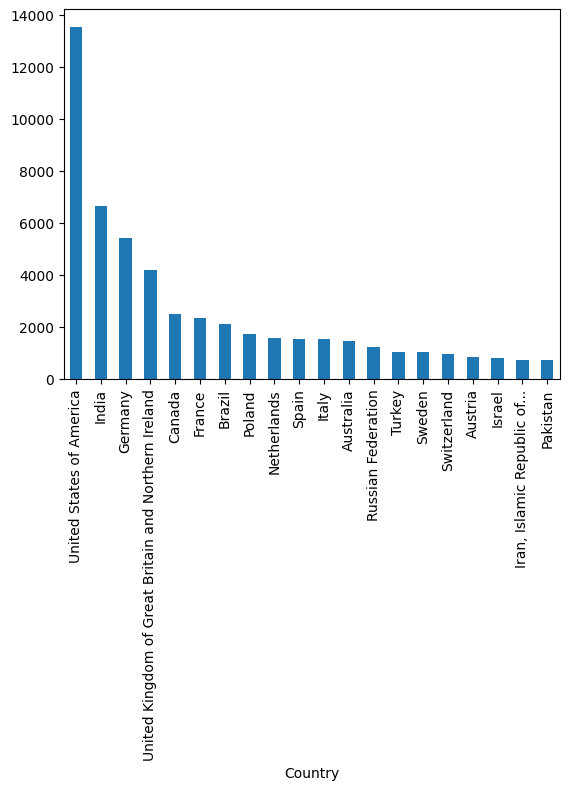

In [7]:
df.Country.value_counts().head(n=20).plot.bar()

# DataPreprocessing

In [8]:
# remove nan's
new = df[['Employment', 'RemoteWork', 'EdLevel', 'YearsCode', 'Country', 'DevType', 'OrgSize', 'Currency', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith']].copy()
new.info()
new_df = new.dropna(subset=['Employment', 'DevType', 'Country', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employment              71709 non-null  object 
 1   RemoteWork              58958 non-null  object 
 2   EdLevel                 71571 non-null  object 
 3   YearsCode               71331 non-null  object 
 4   Country                 71771 non-null  object 
 5   DevType                 61302 non-null  object 
 6   OrgSize                 51039 non-null  object 
 7   Currency                51264 non-null  object 
 8   CompTotal               38422 non-null  float64
 9   CompFreq                44425 non-null  object 
 10  LanguageHaveWorkedWith  70975 non-null  object 
dtypes: float64(1), object(10)
memory usage: 6.1+ MB


### Employment

In [9]:
new_df['Employment'] = new_df['Employment'].replace(to_replace=r'^Employed.*$', value='Employed', regex=True)
new_df['Employment'] = new_df['Employment'].replace(to_replace=r'^Independent.*$', value='Independend', regex=True)
new_df.Employment.value_counts()

/tmp/ipykernel_62241/740389380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Employment'] = new_df['Employment'].replace(to_replace=r'^Employed.*$', value='Employed', regex=True)
/tmp/ipykernel_62241/740389380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Employment'] = new_df['Employment'].replace(to_replace=r'^Independent.*$', value='Independend', regex=True)


Employment
Employed       35135
Independend     3004
Name: count, dtype: int64

In [10]:
new_df.rename(columns={'Employment': "Employed"}, inplace=True)

mapping = {'Employed': 1, 'Independend': 0}
new_df['Employed'] = new_df['Employed'].map(mapping)
new_df.Employed.value_counts()

/tmp/ipykernel_62241/1260605465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'Employment': "Employed"}, inplace=True)
/tmp/ipykernel_62241/1260605465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Employed'] = new_df['Employed'].map(mapping)


Employed
1    35135
0     3004
Name: count, dtype: int64

### Preprocess: RemoteWork

In [11]:
#RemoteWork
new_df['RemoteWork'] = new_df['RemoteWork'].replace(to_replace=r'^Fully remote.*$', value='remote', regex=True)
new_df['RemoteWork'] = new_df['RemoteWork'].replace(to_replace=r'^Hybrid.*$', value='hybrid', regex=True)
new_df['RemoteWork'] = new_df['RemoteWork'].replace(to_replace=r'^Full in-person.*$', value='office', regex=True)

new_df.RemoteWork.value_counts()

/tmp/ipykernel_62241/1736269204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RemoteWork'] = new_df['RemoteWork'].replace(to_replace=r'^Fully remote.*$', value='remote', regex=True)
/tmp/ipykernel_62241/1736269204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RemoteWork'] = new_df['RemoteWork'].replace(to_replace=r'^Hybrid.*$', value='hybrid', regex=True)
/tmp/ipykernel_62241/1736269204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

RemoteWork
remote    17510
hybrid    16040
office     4583
Name: count, dtype: int64

### EdLevel

In [12]:
new_df.EdLevel.value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          18119
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        9893
Some college/university study without earning a degree                                 4498
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1782
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1361
Associate degree (A.A., A.S., etc.)                                                    1271
Professional degree (JD, MD, etc.)                                                      619
Something else                                                                          355
Primary/elementary school                                                               227
Name: count, dtype: int64

In [13]:
mapping = {
'Other doctoral degree (Ph.D., Ed.D., etc.)': 8,
'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 7,
'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 6,
'Associate degree (A.A., A.S., etc.)': 5,
'Some college/university study without earning a degree': 4,
'Professional degree (JD, MD, etc.)': 3,
'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
'Primary/elementary school': 1,
'Something else': 0
}
new_df['EdLevel'] = new_df['EdLevel'].map(mapping)
new_df['EdLevel'].value_counts()

/tmp/ipykernel_62241/550438001.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['EdLevel'] = new_df['EdLevel'].map(mapping)


EdLevel
6.0    18119
7.0     9893
4.0     4498
2.0     1782
8.0     1361
5.0     1271
3.0      619
0.0      355
1.0      227
Name: count, dtype: int64

### Organization Size

In [14]:
mapping = {
    '10,000 or more employees': 9,
    '5,000 to 9,999 employees': 8,
    '1,000 to 4,999 employees': 7,
    '500 to 999 employees': 6,
    '100 to 499 employees': 5,
    '20 to 99 employees': 4,
    '10 to 19 employees': 3,
    '2 to 9 employees': 2,
    'Just me - I am a freelancer, sole proprietor, etc.': 1,
    'I don’t know': 0
}
new_df['OrgSize'] = new_df['OrgSize'].map(mapping)
new_df['OrgSize'].value_counts()

/tmp/ipykernel_62241/2506200709.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['OrgSize'] = new_df['OrgSize'].map(mapping)


OrgSize
4.0    7991
5.0    7297
9.0    5280
7.0    4513
2.0    3353
3.0    3191
6.0    2818
8.0    1721
1.0    1439
0.0     515
Name: count, dtype: int64

### DevType

In [26]:
new_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                                                                                                                                                     5015
Developer, back-end                                                                                                                                                                                                                                                                                       3829
Developer, front-end                                                                                                                                                                                                                                                                                      1550
Developer, front-end;Developer, full-stack;Developer, back-end                     

### ProgrammingLanguages

In [ ]:

categories = {}
for cell in df['LanguageHaveWorkedWith']:
    # print(cell)
    temp = str(cell).split(';')
    for i in temp:
        if i not in categories:
            categories[i] = 0
        categories[i] += 1

print(categories)

### Export

In [15]:
new_df.head()

,Employed,RemoteWork,EdLevel,YearsCode,Country,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith
2,1,hybrid,7.0,14,United Kingdom of Great Britain and Northern I...,Data scientist or machine learning specialist;...,4.0,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python
3,1,remote,6.0,20,Israel,"Developer, full-stack",5.0,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript
10,1,hybrid,6.0,5,United Kingdom of Great Britain and Northern I...,"Developer, full-stack;Developer, back-end",5.0,GBP\tPound sterling,48000.0,Yearly,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL
11,1,remote,6.0,12,United States of America,Engineering manager,4.0,USD\tUnited States dollar,194400.0,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL
12,1,hybrid,6.0,12,United States of America,"Developer, full-stack",2.0,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript


In [16]:
new_df.to_csv('Data/surveydata_v2.csv')